In [3]:
from GTCP import GTCP
from PAMI.subgraphMining.basic import frequentSubgraph
from PAMI.subgraphMining.basic import gspan as gsp
from PAMI.extras.stats import graphDatabase as alg

# import bitarray

In [17]:

import networkx as nx
import matplotlib.pyplot as plt

class graphDatabase:

    def __init__(self, iFile) ->  None:
        self.iFile = iFile

    def plot(self):
        with open(self.iFile, 'r') as file:
            lines = file.readlines()

        current_graph = None
        graphs = []
        vertex_labels = {}
        edge_labels = {}

        for line in lines:
            print(line)
            if line.startswith('t #'):
                if current_graph is not None:
                    if(len(graphs)>=100):
                        break
                    graphs.append((current_graph, vertex_labels, edge_labels))
                current_graph = nx.Graph()
                vertex_labels = {}
                edge_labels = {}
            elif line.startswith('v'):
                _, vertex_id, label = line.split()
                current_graph.add_node(int(vertex_id))
                vertex_labels[int(vertex_id)] = label
            elif line.startswith('e'):
                _, source, target, label = line.split()
                current_graph.add_edge(int(source), int(target))
                edge_labels[(int(source), int(target))] = label

        if current_graph is not None:
            graphs.append((current_graph, vertex_labels, edge_labels))

        n_rows = int(len(graphs) ** 0.5)
        n_cols = (len(graphs) // n_rows) + (len(graphs) % n_rows > 0)

        plt.figure(figsize=(n_cols * 4, n_rows * 4))

        for i, (graph, vertex_labels, edge_labels) in enumerate(graphs):
            ax = plt.subplot(n_rows, n_cols, i + 1)
            pos = nx.spring_layout(graph)
            nx.draw(graph, pos, labels=vertex_labels, ax=ax, with_labels=True, node_color='lightblue',
                    node_size=500, font_size=10, font_weight='bold')
            nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, ax=ax, font_color='black')
            ax.set_title(f"Frequent Subgraph {i + 1}")

        plt.tight_layout()
        plt.show()
    
    def savefig(self,reqids,path):
        with open(self.iFile, 'r') as file:
            lines = file.readlines()

        current_graph = None
        graphs = []
        vertex_labels = {}
        edge_labels = {}
        prev=0
        for line in lines:
            # print(line)
            if line.startswith('t #'):
                # print(line)
                # print()
                line=line.replace("\n","")
                # print(prev)
                if current_graph is not None:
                    if(len(graphs)>=100):
                        break
                    if(prev in reqids):
                        graphs.append((current_graph, vertex_labels, edge_labels))
                prev=int(line.split()[-1])
                # prev=int(line[-1:])
                current_graph = nx.Graph()
                vertex_labels = {}
                edge_labels = {}
            elif line.startswith('v'):
                _, vertex_id, label = line.split()
                current_graph.add_node(int(vertex_id))
                vertex_labels[int(vertex_id)] = label
            elif line.startswith('e'):
                _, source, target, label = line.split()
                current_graph.add_edge(int(source), int(target))
                edge_labels[(int(source), int(target))] = label

        if current_graph is not None:
            if(prev in reqids and len(graphs)<100):
                graphs.append((current_graph, vertex_labels, edge_labels))
        
        print(graphs)
        n_rows = int(len(graphs) ** 0.5)
        n_cols = (len(graphs) // n_rows) + (len(graphs) % n_rows > 0)
        plt.figure(figsize=(n_cols * 4, n_rows * 4))
        for i, (graph, vertex_labels, edge_labels) in enumerate(graphs):
            ax = plt.subplot(n_rows, n_cols, i + 1)
            pos = nx.spring_layout(graph)
            nx.draw(graph, pos, labels=vertex_labels, ax=ax, with_labels=True, node_color='lightblue',
                    node_size=500, font_size=10, font_weight='bold')
            nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, ax=ax, font_color='black')
            ax.set_title(f"Graph id {reqids[i]}")

        plt.tight_layout()
        plt.show()
        plt.savefig(path)
    

    def plotSinglegraph():
        current_graph = None
        graphs = []
        vertex_labels = {}
        edge_labels = {}





# obj=graphDatabase("Toydata.txt")
# obj.savefig([0,4,5],"temp.png")

In [4]:
obj=GTCP("temp.txt",0.3,0.7,0.3);
print("Mining")
obj.mine()

0
9550
Subgraph mining completed
Mining
7049 4845 ??????????????????/
4845
116768


[3344]
[(<networkx.classes.graph.Graph object at 0x7fd706131760>, {0: '10', 1: '13', 2: '1', 3: '1', 4: '1', 5: '2', 6: '2', 7: '3', 8: '3', 9: '3', 10: '3', 11: '3', 12: '3', 13: '3', 14: '3', 15: '3', 16: '3', 17: '3', 18: '3', 19: '3', 20: '3', 21: '3', 22: '3', 23: '3', 24: '3', 25: '3', 26: '3', 27: '3', 28: '3', 29: '3'}, {(0, 3): '2', (0, 4): '2', (0, 6): '1', (0, 18): '1', (1, 25): '1', (2, 12): '2', (5, 7): '1', (5, 8): '1', (5, 12): '1', (6, 7): '1', (6, 9): '1', (7, 10): '1', (7, 11): '1', (8, 9): '1', (10, 13): '1', (10, 14): '2', (11, 16): '2', (11, 17): '1', (12, 13): '1', (13, 15): '2', (14, 19): '1', (15, 20): '1', (16, 21): '1', (17, 22): '2', (18, 23): '2', (18, 24): '1', (19, 20): '2', (21, 25): '2', (22, 25): '1', (23, 26): '1', (24, 27): '2', (26, 28): '2', (27, 28): '1', (28, 29): '1'})]


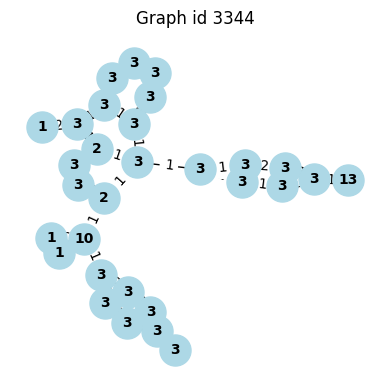

[3345]
[(<networkx.classes.graph.Graph object at 0x7fd6d93efa90>, {0: '11', 1: '1', 2: '1', 3: '1', 4: '1', 5: '1', 6: '1', 7: '1', 8: '1', 9: '2', 10: '2', 11: '2', 12: '2', 13: '2', 14: '2', 15: '3', 16: '3', 17: '3', 18: '3', 19: '3', 20: '3', 21: '3', 22: '3', 23: '3', 24: '3', 25: '3', 26: '3', 27: '3', 28: '3', 29: '3', 30: '3', 31: '3', 32: '3', 33: '3', 34: '3', 35: '3', 36: '3', 37: '3', 38: '3', 39: '3', 40: '3', 41: '3', 42: '3', 43: '3', 44: '3', 45: '3', 46: '3', 47: '3', 48: '3', 49: '3', 50: '3'}, {(1, 37): '2', (2, 38): '2', (3, 47): '1', (4, 48): '1', (5, 13): '1', (6, 14): '1', (7, 13): '2', (8, 14): '2', (9, 15): '1', (9, 17): '1', (9, 21): '1', (9, 22): '1', (10, 16): '1', (10, 18): '1', (10, 23): '1', (10, 24): '1', (11, 19): '1', (11, 27): '1', (12, 20): '1', (12, 28): '1', (13, 45): '1', (14, 46): '1', (15, 19): '1', (16, 20): '1', (17, 25): '1', (18, 26): '1', (25, 33): '2', (25, 35): '1', (26, 34): '2', (26, 36): '1', (27, 29): '2', (27, 31): '1', (28, 30): '2'

<Figure size 640x480 with 0 Axes>

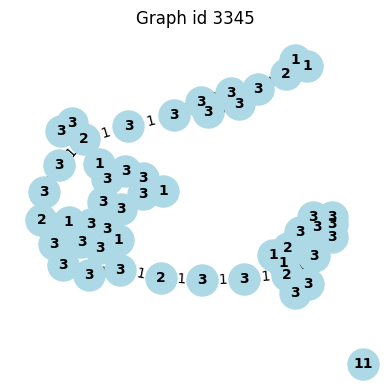

[1212, 4814]
[(<networkx.classes.graph.Graph object at 0x7fd706131760>, {0: '17', 1: '17', 2: '1', 3: '1', 4: '1', 5: '2', 6: '3', 7: '3', 8: '3', 9: '3', 10: '3', 11: '3', 12: '3', 13: '3', 14: '3', 15: '3', 16: '3', 17: '3', 18: '3', 19: '3', 20: '3', 21: '3', 22: '3'}, {(0, 6): '1', (1, 16): '1', (2, 19): '2', (3, 22): '1', (4, 22): '2', (5, 15): '1', (5, 19): '1', (6, 7): '1', (6, 9): '1', (7, 8): '1', (7, 11): '2', (8, 10): '1', (8, 12): '2', (9, 10): '1', (9, 13): '2', (10, 14): '2', (11, 15): '1', (12, 16): '1', (13, 17): '1', (14, 18): '1', (15, 16): '2', (17, 18): '2', (19, 20): '1', (20, 21): '2', (21, 22): '1'}), (<networkx.classes.graph.Graph object at 0x7fd6d94fccd0>, {0: '10', 1: '1', 2: '2', 3: '2', 4: '3', 5: '3', 6: '3', 7: '3', 8: '3', 9: '3', 10: '3', 11: '3', 12: '3', 13: '3', 14: '3', 15: '3', 16: '3', 17: '3', 18: '3', 19: '3', 20: '3'}, {(0, 7): '1', (0, 12): '1', (1, 10): '2', (2, 4): '1', (2, 10): '1', (3, 7): '2', (3, 13): '1', (4, 5): '2', (4, 11): '1', (5, 9

<Figure size 640x480 with 0 Axes>

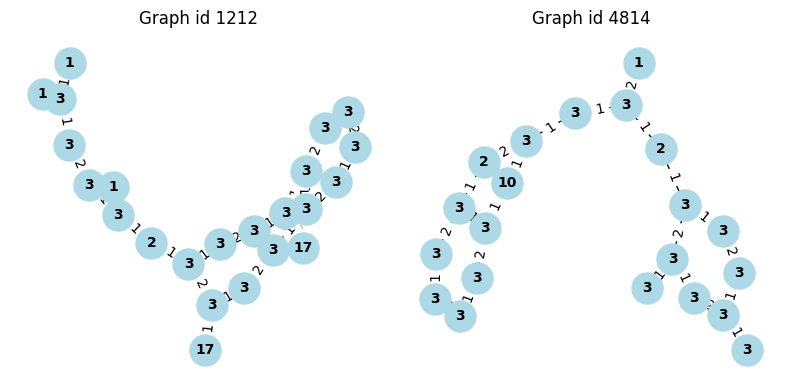

[1212, 7443]
[(<networkx.classes.graph.Graph object at 0x7fd6d92facd0>, {0: '17', 1: '17', 2: '1', 3: '1', 4: '1', 5: '2', 6: '3', 7: '3', 8: '3', 9: '3', 10: '3', 11: '3', 12: '3', 13: '3', 14: '3', 15: '3', 16: '3', 17: '3', 18: '3', 19: '3', 20: '3', 21: '3', 22: '3'}, {(0, 6): '1', (1, 16): '1', (2, 19): '2', (3, 22): '1', (4, 22): '2', (5, 15): '1', (5, 19): '1', (6, 7): '1', (6, 9): '1', (7, 8): '1', (7, 11): '2', (8, 10): '1', (8, 12): '2', (9, 10): '1', (9, 13): '2', (10, 14): '2', (11, 15): '1', (12, 16): '1', (13, 17): '1', (14, 18): '1', (15, 16): '2', (17, 18): '2', (19, 20): '1', (20, 21): '2', (21, 22): '1'}), (<networkx.classes.graph.Graph object at 0x7fd6d9544970>, {0: '2', 1: '2', 2: '3', 3: '3', 4: '3', 5: '3', 6: '3', 7: '3', 8: '3', 9: '3', 10: '3', 11: '3', 12: '3', 13: '3', 14: '3', 15: '3', 16: '3', 17: '3', 18: '3', 19: '3', 20: '3', 21: '3'}, {(0, 2): '1', (0, 6): '1', (1, 3): '1', (1, 7): '1', (2, 3): '2', (2, 9): '1', (3, 10): '1', (4, 5): '1', (4, 9): '2', (

<Figure size 640x480 with 0 Axes>

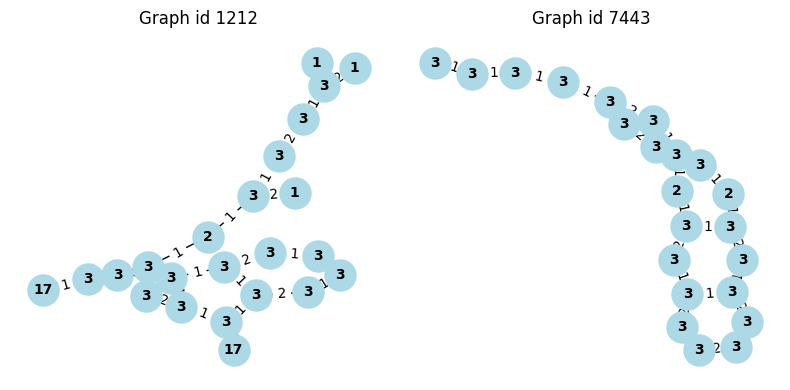

[1517, 4814]
[(<networkx.classes.graph.Graph object at 0x7fd6d94fccd0>, {0: '1', 1: '1', 2: '1', 3: '1', 4: '3', 5: '3', 6: '3', 7: '3', 8: '3', 9: '3', 10: '3', 11: '3', 12: '3', 13: '3', 14: '3', 15: '3', 16: '3', 17: '3', 18: '3', 19: '3', 20: '3', 21: '3', 22: '3', 23: '3', 24: '3'}, {(6, 0): '1', (1, 21): '1', (1, 22): '1', (2, 21): '2', (3, 23): '1', (3, 24): '1', (4, 5): '1', (4, 6): '1', (5, 7): '1', (6, 11): '1', (7, 13): '1', (8, 9): '1', (8, 10): '1', (9, 12): '1', (10, 14): '1', (11, 17): '1', (12, 15): '1', (13, 16): '1', (14, 18): '1', (15, 19): '1', (16, 20): '1', (17, 18): '2', (19, 21): '1', (22, 23): '1'}), (<networkx.classes.graph.Graph object at 0x7fd6d9165af0>, {0: '10', 1: '1', 2: '2', 3: '2', 4: '3', 5: '3', 6: '3', 7: '3', 8: '3', 9: '3', 10: '3', 11: '3', 12: '3', 13: '3', 14: '3', 15: '3', 16: '3', 17: '3', 18: '3', 19: '3', 20: '3'}, {(0, 7): '1', (0, 12): '1', (1, 10): '2', (2, 4): '1', (2, 10): '1', (3, 7): '2', (3, 13): '1', (4, 5): '2', (4, 11): '1', (5, 

<Figure size 640x480 with 0 Axes>

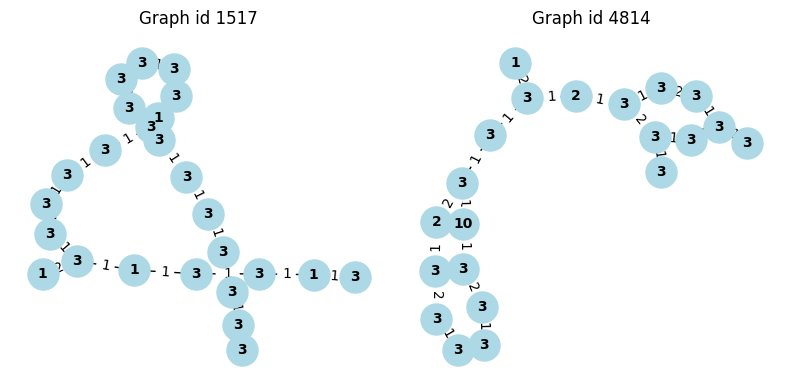

<Figure size 640x480 with 0 Axes>

In [18]:
top=obj.L[:5]
alg=graphDatabase("Datasets/6687e1575dd0040c87a5670a.txt")
for i in top:
    print(i[0])
    alg.savefig(i[0],"temp.png")

    # alg=graphDatabase()
